## Python: distance to circle

Here we use some Python code to show that using the distance of the circuit
to a regular circular circuit does not lead, in general, to the solution.

First some imports:

In [1]:
import numpy as np

import generators
import tsp_utils as tsp

2023-02-13 18:53:30.821567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 18:53:30.947179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 18:53:30.947199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 18:53:30.976982: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-13 18:53:31.693833: W tensorflow/stream_executor/platform/de

We use here a pre-generated set of points,
and start with a circuit that is the solution:

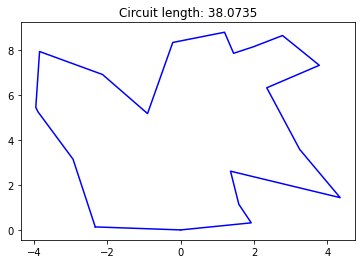

In [2]:
data_ordered = {
    'circuit': list(range(20)),
    'positions': [[5.61124858, 0.12744158], [7.53533112, 0.44305651], [7.1972071, 1.26736082], [6.97040485, 2.74450167], [9.96164286, 1.5657346 ], [8.85814714, 3.71254861], [7.95950991, 6.45946235], [9.39323662, 7.46229075], [8.38939216, 8.78801576], [7.58688029, 8.28218958], [7.05434125, 7.9963722 ], [6.80654294, 8.93429751], [5.39421688, 8.47841582], [4.70642441, 5.31060919], [3.47717329, 7.05187238], [1.76000704, 8.07523684], [1.6571556,  5.58467194], [1.71899507, 5.38315905], [2.67310245, 3.27811276], [3.27978188, 0.2610605 ]]
}

ordered_pmatrix = tsp.pmatrix_from_data(data_ordered)

tsp.paint_circuit(ordered_pmatrix)

This would be a regular circuit with 20 points,
which we will use to order the circuit above once we shuffle it:

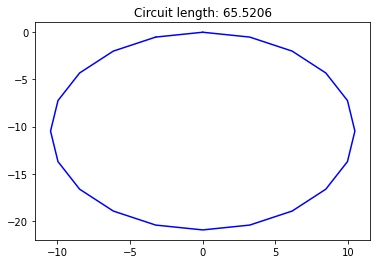

In [3]:
regular_pmatrix = tsp.get_circle_matrix(20, ordered_pmatrix)

tsp.paint_circuit(regular_pmatrix)

Now we shuffle the data:

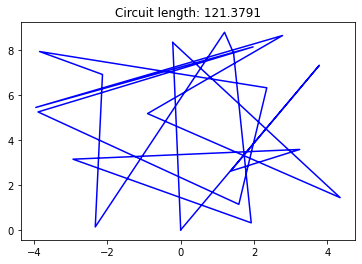

In [6]:
data = tsp.randomize_data(data_ordered)
pmatrix = tsp.pmatrix_from_data(data)

tsp.paint_circuit(pmatrix)

And finally we try to sort it acording to its distance to a regular circular circuit

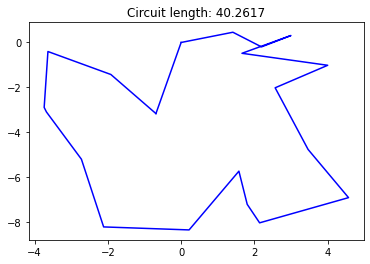

In [7]:
path = tsp.path_to_sink_from_circle(pmatrix, generators.nswap_generators)

tsp.paint_circuit(path[-1])